# Week 8 exercise 1: Handling NETCDF data

Questions?
contact: pengfei.liu@eas.gatech.edu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
# if you get errors to import these packages , you will need to install them in Anaconda
# in anaconda command prompt (windows) or terminal (mac/linux) 
# Activate your environment, then type:
# conda install xarray netcdf4 

In [23]:
## load Atlanta temperature data
# load excel data as pandas dataframe
df=pd.read_excel("./ATL_MonMeanTemp_1879_2022_with_missing.xlsx",skiprows=1)
df=df.replace('M', np.nan)

# temperature of all months
TMP_ATL_all_month=df.iloc[:,1:13]

# calculate annual mean from all months data
TMP_ATL_annual=TMP_ATL_all_month.mean(axis=1,skipna=False)


# unit conversion deg F ->deg C
TMP_ATL_annual_degC=(TMP_ATL_annual-32)*(5/9)

year=df.Year
TMP_ATL_annual_degC


0            NaN
1      16.532407
2      16.833333
3      16.865741
4      16.842593
         ...    
141    18.967593
142    18.199074
143    18.078704
144    18.092593
145          NaN
Length: 146, dtype: float64

## Mini project #1: handling high dimensional NETCDF data

In [14]:
# Download the most recent NCEP renalysis monthly surface temperature (air.mon.mean.nc) from the link below:
# https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.surface.html
# https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Monthlies/surface/
# read NCEP reanalysis monthly data (in netcdf format)
# if you get an error in this step, most likely the netcdf4 package is missing in your environment
# to install netcdf4 package, type "conda install netcdf4" in command line
ds=xr.open_dataset('./air.mon.mean.nc')
# show a summary of the dataset
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 901)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-01-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [17]:
# extract surface air temperature data for 1948 to 2022
TMP_NCEP=ds.air.sel(time=slice("1948-01-01","2022-12-01"))
TMP_NCEP

<xarray.DataArray 'air' (time: 900, lat: 73, lon: 144)>
[9460800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-12-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    level_desc:    0.995 sigma
    actual_range:  [-73.78001  42.14595]

In [28]:
# extracting data from NCEP

# get temperature for the grid cell where Atlanta is located
# Atlanta lat lon
# 33.7490° N, 84.3880° W
# note that the longitude range in NCEP data is 0 - 360 deg

# select data for the grid cell Atlanta located
TMP_ATL_NCEP=TMP_NCEP.sel(lat=33.7490,lon=360-84.3880,method="nearest")

# calculate annual mean temperature for Atlanta
TMP_ATL_NCEP_annual=TMP_ATL_NCEP.groupby('time.year').mean('time')

# calculate climatological mean temperature for Atlanta
TMP_ATL_NCEP_month=TMP_ATL_NCEP.groupby('time.month').mean('time')

# March temperature for ATL
mon=3;
TMP_ATL_NCEP_Mar=TMP_ATL_NCEP.sel(time=(TMP_ATL_NCEP['time.month']==mon))
TMP_ATL_NCEP_Mar

<xarray.DataArray 'air' (time: 75)>
array([14.140004, 11.996135, 10.939685, 13.062591, 11.496136, 14.173554,
       11.316775, 13.910651, 12.21259 , 11.219042, 10.64355 , 10.919683,
        6.82    , 14.218718, 10.41355 , 14.514519, 11.911938, 10.881612,
       11.18194 , 14.10323 , 11.064195,  8.800973, 12.21001 , 10.20291 ,
       12.732266, 15.516458, 15.190969, 11.504517, 14.894195, 14.610971,
       11.319033, 12.850966, 11.803552, 11.28678 , 13.660976, 10.926133,
       11.839032, 13.88194 , 12.365486, 12.456779, 11.838392, 13.136456,
       14.429359, 13.003877, 11.939679, 10.380978, 13.836131, 13.710975,
        9.261618, 15.932911, 11.035813, 11.086132, 14.502589, 10.236777,
       12.231618, 14.001941, 13.723554, 10.870973, 12.049685, 14.951619,
       11.936135, 12.576779,  9.807749, 13.785815, 16.942587,  8.723552,
       10.814842, 13.968546, 14.853217, 13.631447, 11.918545, 12.215314,
       16.662895, 14.233868, 14.00483 ], dtype=float32)
Coordinates:
    lat      float32 32.5
    lon      float32 275.0
  * time     (time) datetime64[ns] 1948-03-01 1949-03-01 ... 2022-03-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    level_desc:    0.995 sigma
    actual_range:  [-73.78001  42.14595]

## Mini project #2: simple 1-D plot with multiple lines

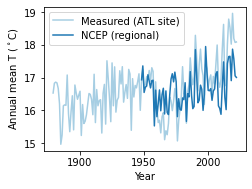

In [30]:
# make a figure that fits into.'opo-9popoopop09i09ioplklllhkjmkmmkkm.mk'k;nj;..';;llllkjyiui90iuiuuuyu8246yhjbn. '
fig=plt.figure(figsize=(3.5, 2.5)) # define figure size, unit: inches
ax=fig.add_axes([0.1, 0.15, 0.8, 0.8]) # define the position of the axes
cmap=plt.get_cmap('Paired') # choose colormap
plt.plot(year,TMP_ATL_annual_degC,label='Measured (ATL site)',color=cmap(0)) 
plt.plot(TMP_ATL_NCEP_annual.year,TMP_ATL_NCEP_annual,label='NCEP (regional)',color=cmap(1))
plt.xlabel('Year')
plt.ylabel('Annual mean T ($^\circ$C)')
# add figure legend
plt.legend()

# save figure as .PDF and .PNG
# put save commands before plt.show()
fn='Fig_ATL_temp'
plt.savefig(fn+'.pdf',bbox_inches="tight")
plt.savefig(fn+'.png',bbox_inches="tight")
plt.show()